In [92]:
from gensim.models import Word2Vec

import numpy as np
import pandas as pd

from sklearn.decomposition import PCA

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

## Dane

In [139]:
sentences = []

for i in range(100000):
    start = np.random.randint(0,20)
    finish = start + np.random.randint(1,10)
    sentence = [str(x) for x in list(range(start, finish))]
    sentences.append(sentence)

In [140]:
sentences

[['19', '20', '21'],
 ['19', '20', '21', '22', '23', '24'],
 ['7', '8', '9'],
 ['16', '17', '18', '19', '20'],
 ['10', '11', '12'],
 ['2'],
 ['5'],
 ['11'],
 ['8', '9', '10', '11'],
 ['18', '19', '20', '21', '22', '23', '24', '25', '26'],
 ['6', '7', '8', '9', '10', '11', '12'],
 ['17', '18'],
 ['17', '18', '19', '20', '21', '22', '23', '24', '25'],
 ['15', '16', '17', '18', '19', '20'],
 ['7', '8', '9', '10'],
 ['3', '4', '5', '6', '7', '8', '9'],
 ['11', '12', '13', '14', '15', '16', '17', '18', '19'],
 ['14', '15', '16'],
 ['11', '12', '13', '14', '15'],
 ['2', '3'],
 ['19', '20', '21', '22', '23', '24', '25', '26'],
 ['12'],
 ['4', '5', '6', '7', '8', '9', '10', '11'],
 ['4', '5', '6', '7', '8', '9'],
 ['1', '2', '3', '4'],
 ['18', '19', '20', '21', '22', '23', '24', '25', '26'],
 ['15'],
 ['2', '3', '4', '5', '6'],
 ['3', '4', '5'],
 ['4'],
 ['0', '1', '2', '3', '4'],
 ['11'],
 ['14', '15', '16', '17', '18', '19', '20'],
 ['13', '14', '15', '16', '17', '18', '19'],
 ['8', '9', '10

## Model Word2Vec

In [141]:
model = Word2Vec(sentences, size=20, window=4, min_count = 1)
model

In [142]:
model.wv['1']

array([-0.8128499 , -2.468241  , -2.5277345 ,  1.3823446 , -1.4751529 ,
       -0.23161504, -0.94638026, -0.15144987, -1.4706821 , -1.2254367 ,
       -0.461911  , -0.87448597,  1.0737972 , -2.5451467 , -1.593866  ,
        0.24941398,  0.9753165 , -1.7295703 , -0.10959856, -0.8465547 ],
      dtype=float32)

In [143]:
def plot_heatmap(model):
    plt.figure(figsize=(15, 10))
    sns.heatmap(model.wv[model.wv.vocab], linewidths=0.5)

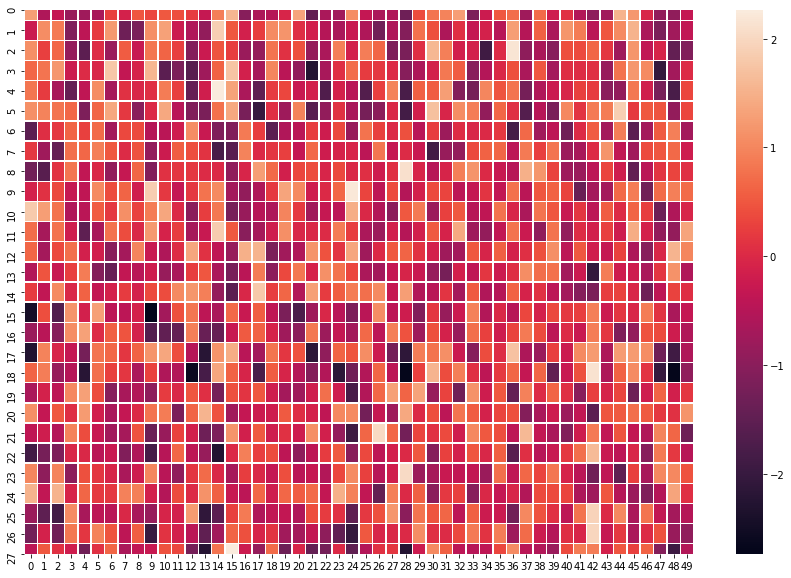

In [144]:
plot_heatmap(Word2Vec(sentences, size=50, window=4, min_count = 1))

## PCA

In [145]:
def plot_PCA(model):
    X = model.wv[model.wv.vocab]
    pca_model = PCA(n_components=2)
    result = pca_model.fit_transform(X)

    plt.figure(figsize=(15,8))
    plt.scatter(result[:,0],result[:,1]);


    words = list(model.wv.vocab)
    for i, word in enumerate(words):
        plt.annotate(word, xy=(result[i, 0], result[i, 1]))

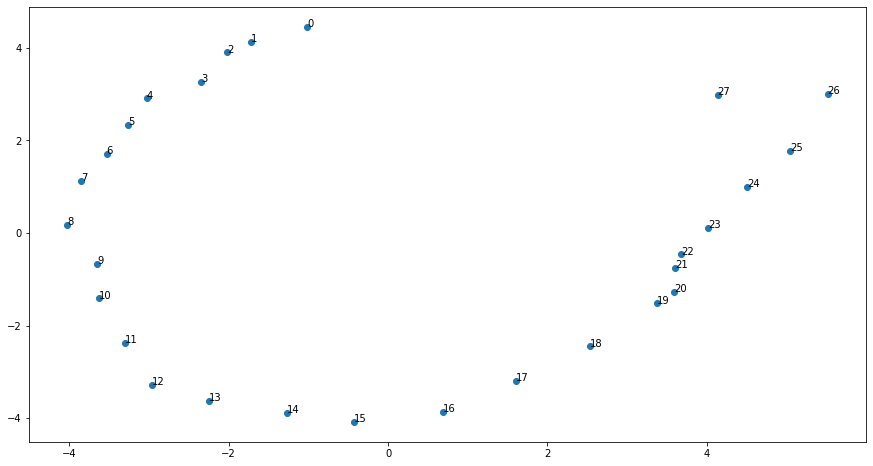

In [146]:
plot_PCA(Word2Vec(sentences, size=50, window=4, min_count = 1))

## Podobne słowa

In [147]:
model = Word2Vec(sentences, size=50, window=4, min_count = 1)

In [153]:
model.wv.most_similar('10', topn=3)

[('8', 0.3663967251777649),
 ('7', 0.35577917098999023),
 ('12', 0.35414618253707886)]

## Skutek uboczny - nauka matematyki - typ unspupervised ale możemy dotrenować używając gotowych wyników i nauki nadzorowanej

In [149]:
model.wv.most_similar(positive = ['10', '8'], negative=['5'], topn=3)

[('12', 0.3942561745643616),
 ('11', 0.36022740602493286),
 ('13', 0.29416924715042114)]